# Exploratory Data Analysis Cheatsheet

Exploratory Data Analysis (EDA ) is a crucial step in the data scienc eprocess. It involves analyzing and summarizing a dataset in order to understan its properties and relationships.EDA allows data scientists to uncover patterns, trends and anomalies in the data and to generate the hypotheses for further investigation It helps to identify any missing or incorrect data and to determne te most appropriate statistical methods and visualizations for the data.

In [46]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#load the dataset

df = pd.read_csv('/content/titanic (2).csv')

In [48]:
df.head() # print the first few rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.shape    #print the DataFrame shape

(891, 12)

In [50]:
df.dtypes  #print the DataFrame data types

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [51]:
df.isnull().sum()   #Check the missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


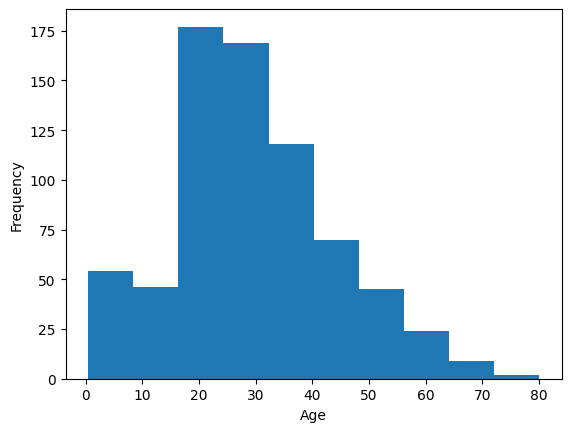

In [52]:
# visualize the distribution of the numeric column

plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

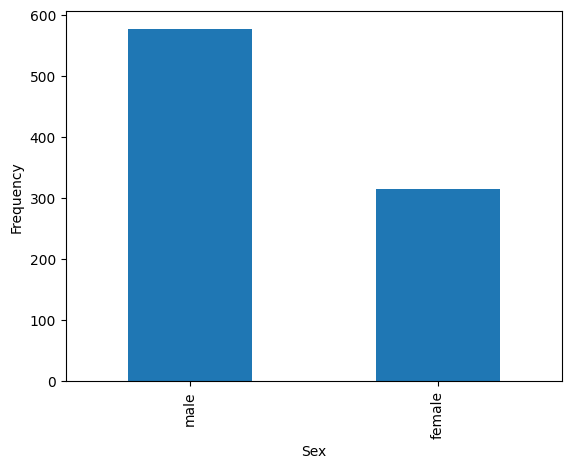

In [53]:
# Visualize the distrubution of a categorical colun
df['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()


In [54]:
# Calculate the basic statistics for a numeric columns
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [55]:
# Calculate the correlation between two numeric columns
df['Fare'].corr(df['Survived'])

0.2573065223849625

In [56]:
# Group the data by a categorical column and calculate statistics
grouped_df = df.groupby('Pclass')['Survived'].mean()
grouped_df

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


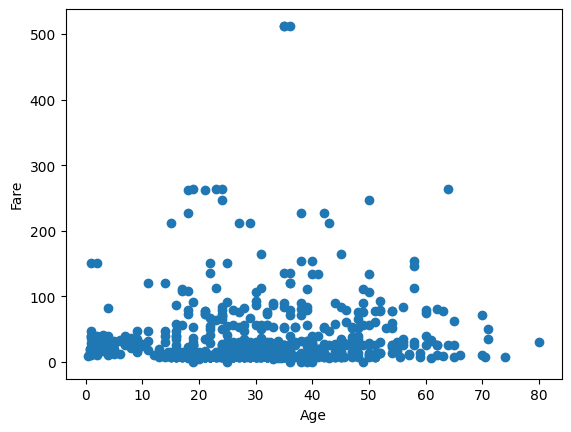

In [57]:
# Create a scatter plot to visualize the relationship between teo numeric values

plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

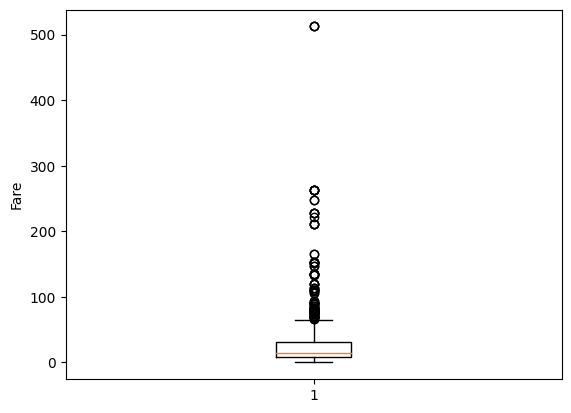

In [58]:
# Create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['Fare'])
plt.ylabel('Fare')
plt.show()

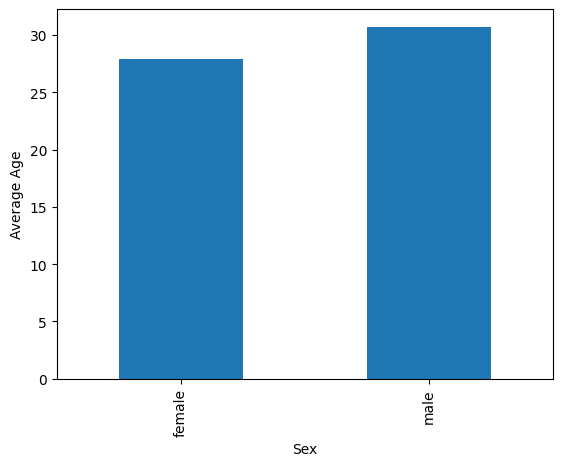

In [59]:
# create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df.groupby('Sex')['Age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.show()

In [60]:
# create a pivot table to summarize the data
pivot_table = df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='mean')
print(pivot_table)

Pclass           1          2          3
Sex                                     
female  106.125798  21.970121  16.118810
male     67.226127  19.741782  12.661633


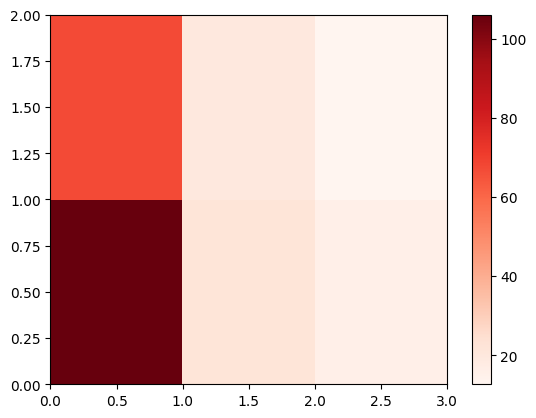

In [61]:
# Create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.show()


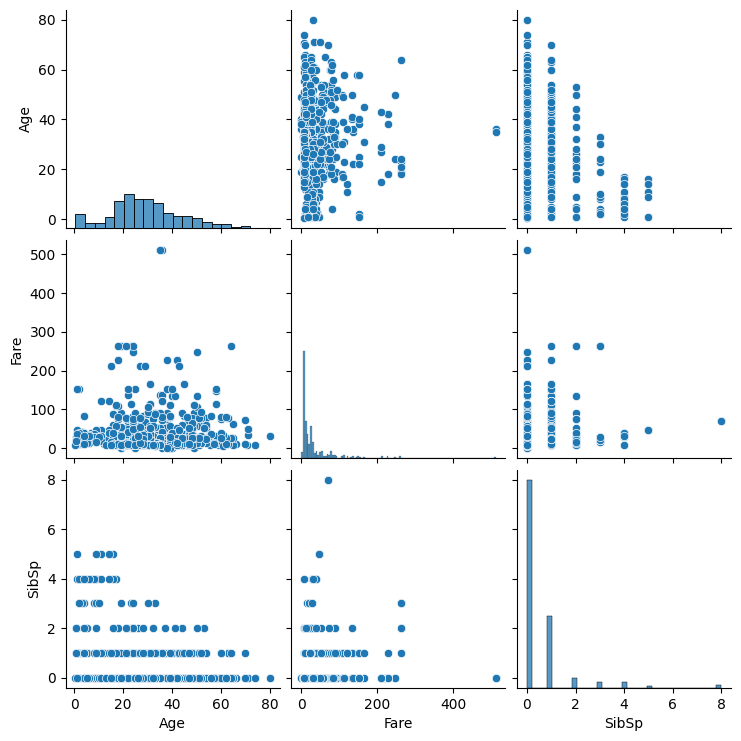

In [62]:
# create a pairplot to visualize the relationships between multiple numeric columns
import seaborn as sns
sns.pairplot(df, vars=['Age', 'Fare', 'SibSp'])
plt.show()

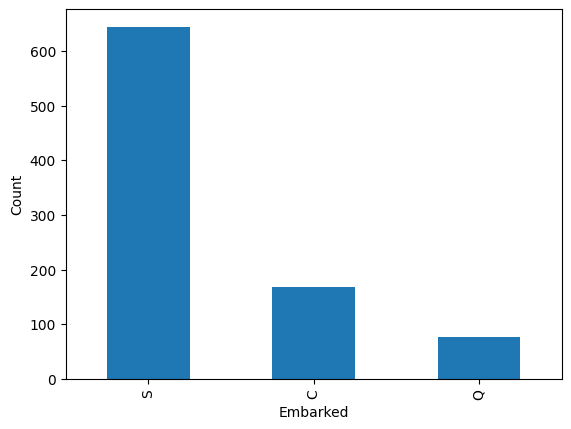

In [63]:
# create a bar plot to visualize the count of a categorical column
df['Embarked'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

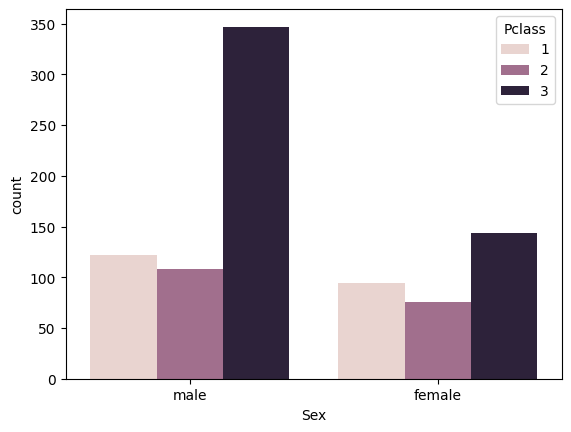

In [64]:
# create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='Sex', hue='Pclass', data=df)
plt.show()

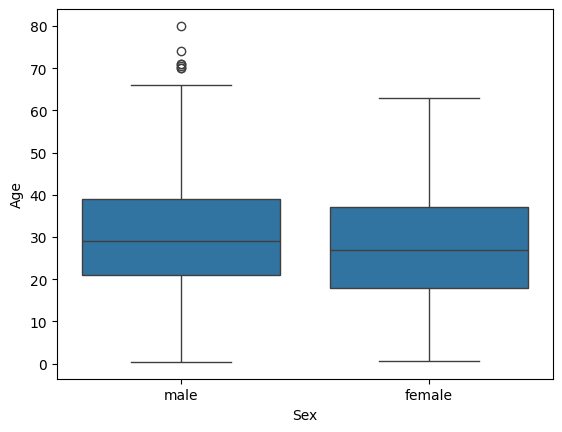

In [65]:
# create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

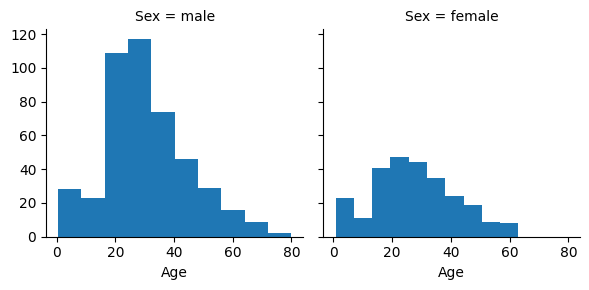

In [66]:
# create a faceting grid to visualize the distribution of multiple numeric columns by the categories of a categorical column
g = sns.FacetGrid(df, col='Sex')
g.map(plt.hist, 'Age')
plt.show()

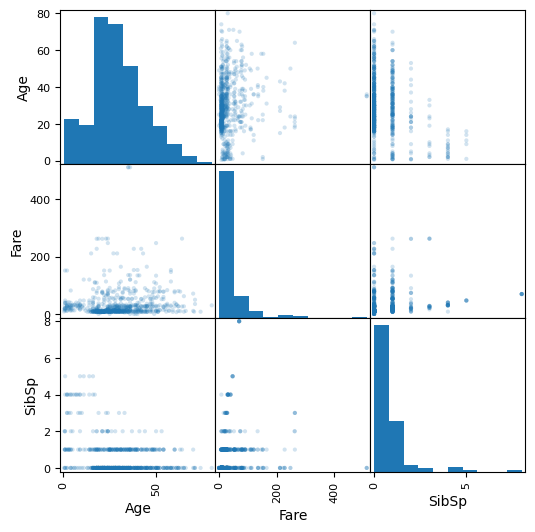

In [67]:
# create a scatter plot matrix to visualize the relationships between multiple numeric columns
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Age', 'Fare', 'SibSp']], alpha=0.2, figsize=(6, 6))
plt.show()

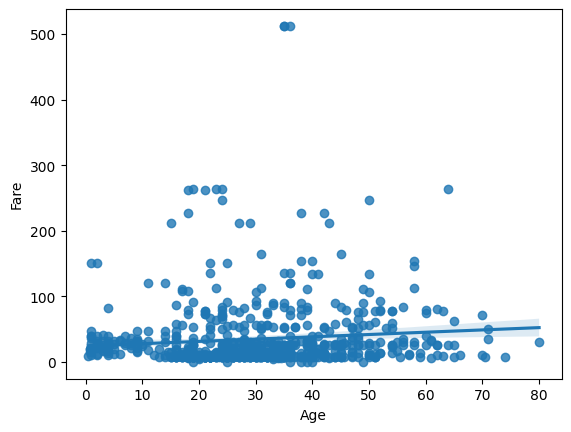

In [68]:
# create a regression plot to visualize the relationship between two numeric columns
sns.regplot(x='Age', y='Fare', data=df)
plt.show()

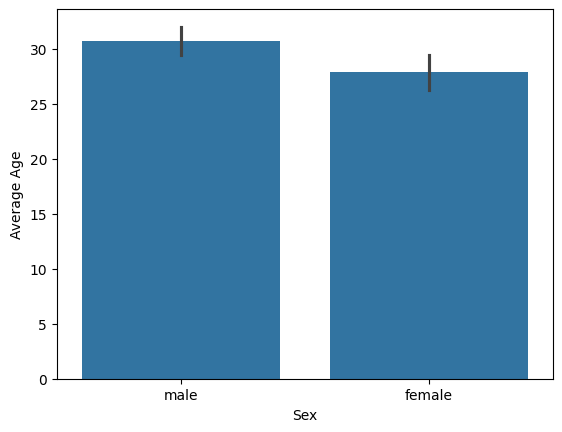

In [69]:
# create a barplot to visualize the mean of a numeric column by the categories of a categorical column
sns.barplot(x='Sex', y='Age', data=df)
plt.ylabel('Average Age')
plt.show()

# Data Preprocessing





*   Handling missing values- This technique is used when there are missing values in the dataset. There are various ways to handle missing values, such as filling them with the mean, median, or mode of the column, or dropping rows with missing values. The appropriate method will depend on the specific dataset and the goal of the analysis.

*   Encoding categorical values- This technique is used when the dataset contains categorical variables, which are variables that can take on a limited number of categories. One-hot encoding is a common method for encoding categorical variables, which creates a new binary column for each category. This is useful for inputting categorical variables into machine learning models, which typically only accept numerical input.


*   Standardizing numeric columns- This technique is used to scale the values of a numeric column so that they have zero mean and unit variance. This is often useful when the numeric columns have different scales and the machine learning model will be sensitive to this difference in scales.

*   Normalizing numeric Columns- This technique is used to scale the values of a numeric column so that they have a minimum value of 0 and a maximum value of 1. This is often useful when the numeric columns have different scales and the machine learning model will be sensitive to this difference in scales.


*   Binning numeric columns- This technique is used to divide the values of a numeric column into bins. This is useful for turning a continuous numeric column into a categorical column, which can be useful for certain types of analysis or machine learning models.

*   Applying min-max scaling- This technique is used to scale the values of a numeric column so that they have a minimum value of 0 and a maximum value of 1. This is often useful when the numeric columns have different scales and the machine learning model will be sensitive to this difference in scales.

- Applying robust scaling: This technique is used to scale the values of a numeric column using the median and interquartile range. This is often useful when the data contains outliers, as it is less sensitive to the influence of outliers compared to other scaling methods.

- Applying power transformations: Power transformations are a class of functions that can be used to transform the values of a numeric column in order to stabilize or improve the assumptions of certain statistical models. Power transformations can be useful for correcting the skewness of a distribution, as skewed distributions can cause problems when fitting certain types of models.

Applying quantile transformations: This technique is used to transform the values of a numeric column so that they have a uniform or normal distribution. This can be useful for improving the assumptions of certain machine learning models, which may assume that the predictor variables are normally distributed.

Applying box-cox transformations: This technique is used to transform the values of a numeric column so that they are approximately normally distributed. This can be useful for improving the assumptions of certain machine learning models, which may assume that the predictor variables are normally distributed.









In [70]:
#Create a copy of the original DataFrame

df_preprocessed = df.copy()

In [71]:
# Handling missing values in the DataFrame

df_preprocessed['Age'].fillna(df_preprocessed['Age'].mean(), inplace=True)
df_preprocessed.dropna(inplace=True)

In [72]:
# Encode categorical variales using one-hot encoding
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['Sex', 'Embarked'])

In [73]:
# Standardize the values of a numeric column

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_preprocessed['Age'] = scaler.fit_transform(df_preprocessed[['Age']])

In [74]:
# Normalize the value of numeric column
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
df_preprocessed['Fare'] = normalizer.fit_transform(df_preprocessed[['Fare']])

In [75]:
# apply a min-max scaling to  a numeric column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_preprocessed['Fare'] = scaler.fit_transform(df_preprocessed[['Fare']])

In [76]:
# Apply a robust scaling to a numeric column
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_preprocessed['Fare'] = scaler.fit_transform(df_preprocessed[['Fare']])


In [77]:
# apply a power transformer to a numeric column
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
df_preprocessed['Fare'] = transformer.fit_transform(df_preprocessed[['Fare']])

**Several Statistical methods**

Mann-Whitney U test: This technique is used to compare the distribution of two numeric columns. It can be used to test the hypothesis that the two columns have the same distribution, or to determine the statistical significance of the difference between the two distributions.

Kruskal-Wallis H test: This technique is similar to the Mann-Whitney U test, but it can be used to compare the distribution of two or more numeric columns. It can be used to test the hypothesis that the columns have the same distribution, or to determine the statistical significance of the difference between the distributions.

Wilcoxon signed-rank test: This technique is similar to the Mann-Whitney U test, but it is used to compare the distribution of two paired numeric columns. It can be used to test the hypothesis that the two columns have the same distribution, or to determine the statistical significance of the difference between the distributions.

In [78]:
# Calculate the summary statistics for a numeric column
df_preprocessed['Age'].describe()

,Age
count,2.020000e+02
mean,-4.396923e-17
std,1.002484e+00
min,-2.286913e+00
25%,-6.763541e-01
50%,-1.078427e-01
75%,7.783661e-01
max,3.002249e+00


In [79]:
# Calculate the skewness and kurtosis of a numeric column

df_preprocessed['Age'].skew()
df_preprocessed['Age'].kurtosis()

-0.008590749089309568

In [80]:
# Calculate the correlation between two numeric columns

df_preprocessed['Age'].corr(df_preprocessed['Fare'])

-0.009202866204202563

In [81]:
# Perfor the t-test to compare the means of two numeric columns

from scipy.stats import ttest_ind
t, p = ttest_ind(df_preprocessed['Age'], df_preprocessed['Fare'])
print(t, p)

-5.069086691462694e-16 0.9999999999999996


In [82]:
# perform an ANOVA test to compare the means of two or more numeric columns
from scipy.stats import f_oneway

f, p = f_oneway(df_preprocessed['Age'], df_preprocessed['Fare'])
print(f, p)

3.890776474165772e-31 1.0


In [83]:
# perform a Mann-Whitney U test to compare the distribution of two numeric columns
from scipy.stats import mannwhitneyu

u, p = mannwhitneyu(df_preprocessed['Age'], df_preprocessed['Fare'])
print(u, p)



16725.0 0.0008405807344361302


In [84]:
# perform a Kruskal-Wallis H test to compare the distribution of two or more numeric columns
from scipy.stats import kruskal

h, p = kruskal(df_preprocessed['Age'], df_preprocessed['Fare'])
print(h, p)



11.152450105712356 0.0008392076187014951


In [85]:
# perform a Wilcoxon signed-rank test to compare the distribution of two paired numeric columns
from scipy.stats import wilcoxon

w, p = wilcoxon(df_preprocessed['Age'], df_preprocessed['Fare'])
print(w, p)

9177.0 0.19639433000797546
